In [1]:
import os
import sys
import re

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

from scripts.path import return_path
PATH = return_path() + 'twitch_data/'

In [2]:
df = pd.read_csv(os.path.join(PATH, 'twitchdata-update.csv'))
df.sort_values(by='Peak viewers', ascending=False, inplace=True)
print(df.shape)
display(df.head(5))

(1000, 11)


,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
12,Riot Games (riotgames),2674646715,80820,639375,20960,4487489,497678,56855694,True,False,English
25,TheGrefg,1757406750,54855,538444,28887,3795667,3593081,47094362,True,False,Spanish
81,dota2ti,1017577605,6315,483530,147643,663297,121422,16228039,True,False,English
96,shroud,888505170,30240,471281,29612,7744066,833587,30621257,True,False,English
109,dota2ti_ru,812538090,6195,457060,126232,541644,108438,12068376,True,False,Russian


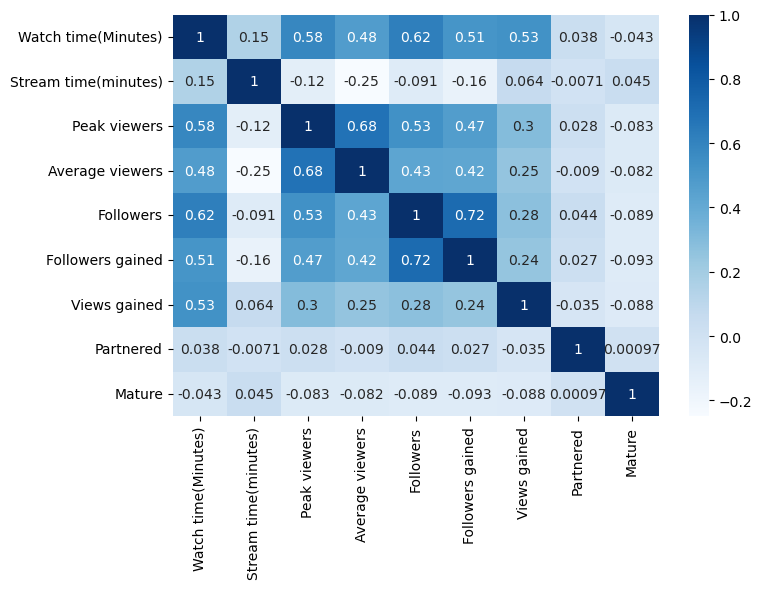

In [3]:
fig, ax = plt.subplots(figsize=(8, 6), layout='tight', facecolor='white', dpi=100)
sb.heatmap(df.corr(method='pearson'), annot=True, cmap='Blues')
plt.show()

In [4]:
df.describe().astype('int64')

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained
count,1000,1000,1000,1000,1000,1000,1000
mean,418427930,120515,37065,4781,570054,205518,11668165
std,549635514,85376,60314,8453,804413,339913,24905722
min,122192850,3465,496,235,3660,-15772,175788
25%,163189893,73758,9113,1457,170546,43758,3880602
50%,234990787,108240,16676,2425,318063,98352,6456323
75%,433739917,141843,37569,4786,624332,236130,12196762
max,6196161750,521445,639375,147643,8938903,3966525,670137548


In [5]:
df.loc[df['Channel'].str.lower().str.contains('xqcow')]

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English


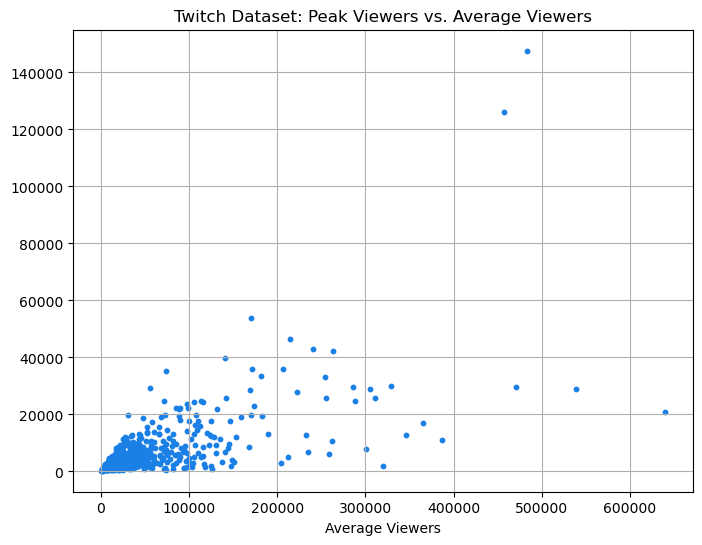

In [6]:
plt.figure(figsize=(8, 6), dpi=100)
plt.scatter(x=df['Peak viewers'], y=df['Average viewers'], s=10, color=(0.1, 0.5, 0.9))
plt.title('Twitch Dataset: Peak Viewers vs. Average Viewers')
plt.xlabel('Peak Viewers')
plt.xlabel('Average Viewers')
plt.grid(visible=True)

In [7]:
# ['aggrnyl', 'agsunset', 'algae', 'amp', 'armyrose', 'balance',
# 'blackbody', 'bluered', 'blues', 'blugrn', 'bluyl', 'brbg',
# 'brwnyl', 'bugn', 'bupu', 'burg', 'burgyl', 'cividis', 'curl',
# 'darkmint', 'deep', 'delta', 'dense', 'earth', 'edge', 'electric',
# 'emrld', 'fall', 'geyser', 'gnbu', 'gray', 'greens', 'greys',
# 'haline', 'hot', 'hsv', 'ice', 'icefire', 'inferno', 'jet',
# 'magenta', 'magma', 'matter', 'mint', 'mrybm', 'mygbm', 'oranges',
# 'orrd', 'oryel', 'oxy', 'peach', 'phase', 'picnic', 'pinkyl',
# 'piyg', 'plasma', 'plotly3', 'portland', 'prgn', 'pubu', 'pubugn',
# 'puor', 'purd', 'purp', 'purples', 'purpor', 'rainbow', 'rdbu',
# 'rdgy', 'rdpu', 'rdylbu', 'rdylgn', 'redor', 'reds', 'solar',
# 'spectral', 'speed', 'sunset', 'sunsetdark', 'teal', 'tealgrn',
# 'tealrose', 'tempo', 'temps', 'thermal', 'tropic', 'turbid',
# 'turbo', 'twilight', 'viridis', 'ylgn', 'ylgnbu', 'ylorbr',
# 'ylorrd']

scatter_plot = px.scatter(data_frame=df, x='Peak viewers', y='Average viewers',
        hover_data=['Channel', 'Language'], color='Followers', color_continuous_scale='cividis',
		labels={
			"Peak viewers": "Peak Viewers",
			"Average viewers": "Average Viewers",
		},
        title='Twitch Dataset: Peak Viewers vs. Average Viewers'
)
scatter_plot.update_traces(marker_size=10)
scatter_plot.update_layout(margin=dict(l=10, r=10, t=80, b=20), width=1000, height=600)
scatter_plot.show()

## SOURCE
https://www.kaggle.com/datasets/aayushmishra1512/twitchdata